<a href="https://colab.research.google.com/github/new-divos/ttirep/blob/develop/rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ интенсивности выходного потока

In [0]:
import numpy as np
from scipy import optimize
from scipy.special import gamma

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

## Преобразование потока, имеющего распределение Парето в поток, имеющий экспоненциальное распределение

### Математическое ожидание в качестве меры центральной тенденции

Математическое ожидание для потока, имеющего распределение Парето, может быть 
получено по формуле
$$
E = \frac{\alpha\,x_m}{\alpha - 1},
$$
где $\alpha$ - коэффициент формы, а $x_m$ - коэффициент масштаба. Значения коэффициента формы $\alpha$ и показателя Херста $H$ для распределения Парето связаны с использованием следующего соотношения:
$$
\alpha = 3 - 2H.
$$

Математическое ожидание для потока, имеющего экспоненциальное распределение
$$
E' = \frac 1\lambda,
$$
где $\lambda$ - интенсивность потока.

Приравняв значения $E$ и $E'$ найдем интенсивность потока $\lambda$ экспоненциального распределения, при котором будет обеспечено равеснство математических ожиданий входного и выходного потоков:
$$
\frac {\alpha\,x_m}{\alpha - 1} = \frac 1\lambda,
$$
откуда
$$
\lambda = \frac {\alpha - 1}{\alpha\,x_m}.
$$

Построим график зависимости $\lambda(H)$ в случае, когда коэффициент масштаба $x_m = 1$

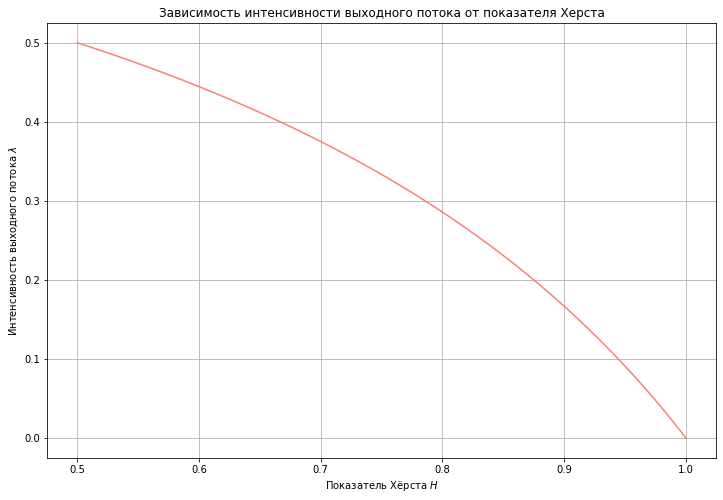

In [3]:
hurst = np.linspace(0.5, 1.0, 100)
shape = 3.0 - 2.0 * hurst
rate_e = (shape - 1) / shape

plt.plot(hurst, rate_e, color='salmon')

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)

plt.show();

### Медиана в качестве меры центральной тенденции

Величина медианы для потока, имеющего распределение Парето может быть получена по формуле
$$
M = x_m\,2^{1 / \alpha}
$$

Величина медианы для потока, имеющего экспоненциальное распределение
$$
M' = \frac{\ln 2}\lambda
$$

Приравняв значения $M$ и $M'$ найдем интенсивность потока $\lambda$ экспоненциального распределения, при котором будет обеспечено равеснство медиан входного и выходного потоков:
$$
x_m\,2^{1 / \alpha} = \frac {\ln 2}\lambda,
$$
откуда
$$
\lambda = \frac {\ln 2}{x_m\,2^{1 / \alpha}}.
$$

Построим график зависимости $\lambda(H)$ в случае, когда коэффициент масштаба $x_m = 1$

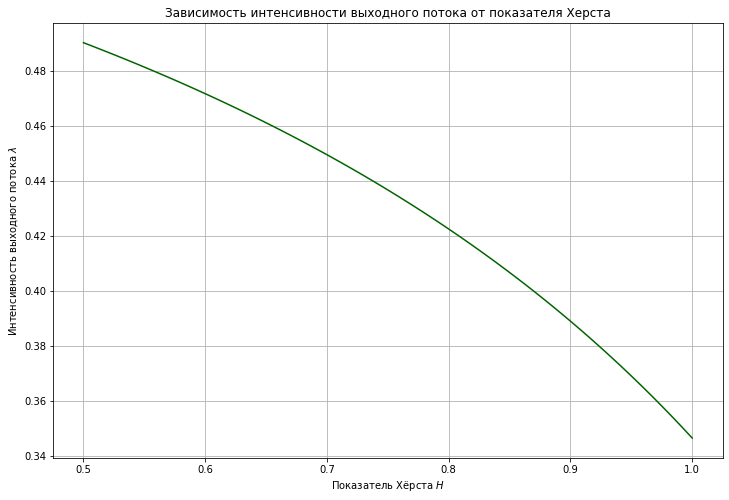

In [4]:
rate_m = np.log(2) / (2 ** (1 / shape))

plt.plot(hurst, rate_m, color='darkgreen')

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)

plt.show();

### Сравнительный анализ методов функциональных преобразований

Построим графики зависимости $\lambda(H)$ для двух случаев

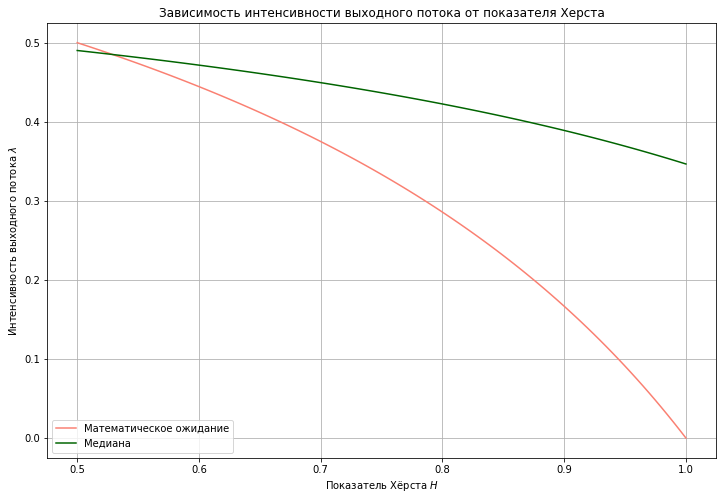

In [5]:
plt.plot(hurst, rate_e, color='salmon', label="Математическое ожидание")
plt.plot(hurst, rate_m, color='darkgreen', label="Медиана")

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)
plt.legend(loc='lower left')

plt.show();

Найдем точку пересеченя двух графиков, для этого приравняем значения интенсивности $\lambda$ для этих двух методов:
$$
\frac {\alpha - 1}{\alpha\,x_m} = \frac {\ln 2}{x_m\,2^{1 / \alpha}}.
$$
После несложных преобразований это выпажение может быть сведено к следующему уравнению:
$$
2^{1 / \alpha} = \frac {\alpha\ln 2}{\alpha - 1}.
$$
Найдем значение $\alpha$, удовлетворяющее этому уравнению.

In [6]:
def eq(x):
  return 2 ** (1.0 / x) - (x * np.log(2)) / (x - 1)

with np.errstate(divide='ignore'):
  solution = optimize.root_scalar(eq, bracket=[1.0, 2.0], method='brentq')
shape0 = solution.root

print(shape0)

1.9420855965037955


Этому значению соответствует следующая величина показателя Херста:

In [7]:
hurst0 = (3 - shape0) / 2
print(hurst0)

0.5289572017481022


## Преобразование потока, имеющего распределение Вейбулла в поток, имеющий экспоненциальное распределение

### Математическое ожидание в качестве меры центральной тенденции

Математическое ожидание для потока, имеющего распределение Вейбулла, может быть получено по формуле
$$
E = s\,\Gamma\left(1 + \frac 1\alpha\right)
$$
где $\alpha$ - коэффициент формы, а $s$ - коэффициент масштаба. Значения коэффициента формы $\alpha$ и показателя Херста $H$ для распределения Вейбулла связаны с использованием следующего соотношения:
$$
\alpha = 2 - 2H.
$$

Математическое ожидание для потока, имеющего экспоненциальное распределение
$$
E' = \frac 1\lambda,
$$
где $\lambda$ - интенсивность потока.

Приравняв значения $E$ и $E'$ найдем интенсивность потока $\lambda$ экспоненциального распределения, при котором будет обеспечено равеснство математических ожиданий входного и выходного потоков:
$$
s\,\Gamma\left(1 + \frac 1\alpha\right) = \frac 1\lambda,
$$
откуда
$$
\lambda = \frac 1{s\,\Gamma\left(1 + \frac 1\alpha\right)},
$$
где $\Gamma(z)$ - гамма-функция:
$$
\Gamma(z) = \int_0^\infty t^{z-1}\,e^{-t}\,dt.
$$

Построим график зависимости $\lambda(H)$ в случае, когда коэффициент масштаба $s = 1$

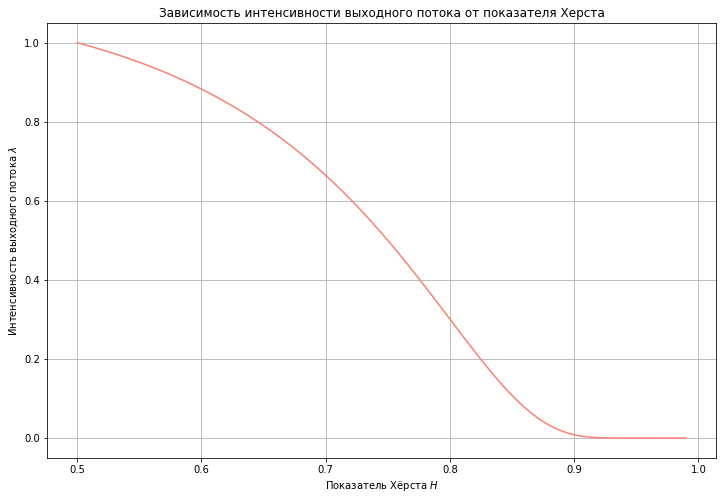

In [8]:
hurst = np.linspace(0.5, 0.99, 100)
shape = 2.0 - 2.0 * hurst
rate_e = 1 / gamma(1 + 1 / shape)

plt.plot(hurst, rate_e, color='salmon')

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)

plt.show();

### Медиана в качестве меры центральной тенденции

Величина медианы для потока, имеющего распределение Парето может быть получена по формуле
$$
M = s\,(\ln 2)^{1 / \alpha}
$$

Величина медианы для потока, имеющего экспоненциальное распределение
$$
M' = \frac{\ln 2}\lambda
$$

Приравняв значения $M$ и $M'$ найдем интенсивность потока $\lambda$ экспоненциального распределения, при котором будет обеспечено равеснство медиан входного и выходного потоков:
$$
s\,(\ln 2)^{1 / \alpha} = \frac {\ln 2}\lambda,
$$
откуда
$$
\lambda = \frac 1s\,(\ln 2)^{1 - 1 / \alpha}.
$$

Построим график зависимости $\lambda(H)$ в случае, когда коэффициент масштаба $s = 1$:

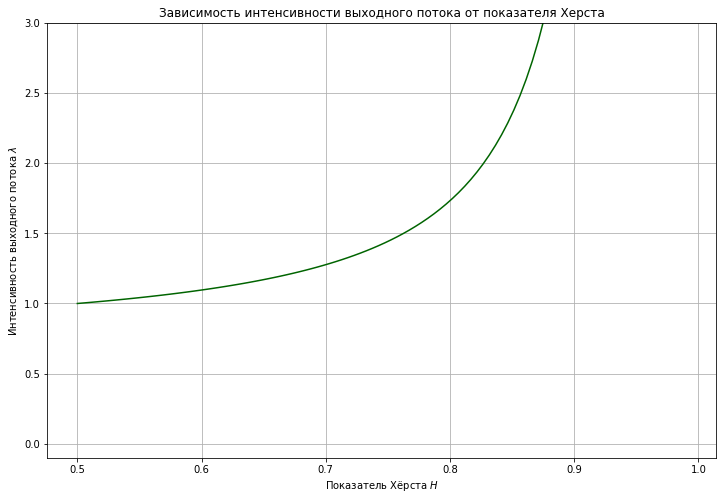

In [9]:
rate_m = np.log(2) ** (1 - 1 / shape)

plt.plot(hurst, rate_m, color='darkgreen')

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)

plt.ylim((-0.1, 3.0))

plt.show();

### Сравнительный анализ методов функциональных преобразований

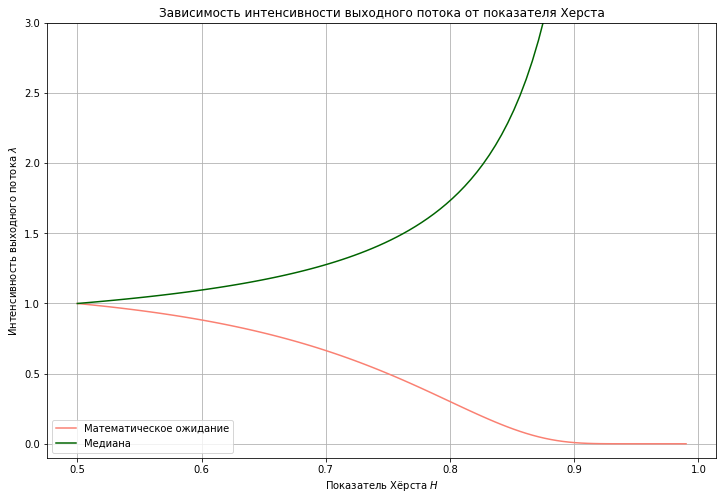

In [10]:
plt.plot(hurst, rate_e, color='salmon', label="Математическое ожидание")
plt.plot(hurst, rate_m, color='darkgreen', label="Медиана")

plt.title("Зависимость интенсивности выходного потока от показателя Херста")
plt.xlabel("Показатель Хёрста $H$")
plt.ylabel("Интенсивность выходного потока $\lambda$")
plt.grid(True)
plt.legend(loc='lower left')

plt.ylim((-0.1, 3.0))

plt.show();